In [33]:
import pandas as pd
from json import load
import matplotlib.pyplot as plt

In [34]:
results_path = input("Diretório de resultados: ")

with open(f'{results_path}/env.json', 'r') as f:
    env = load(f)

In [35]:
messages_df = pd.read_csv(f'{results_path}/messages.csv')
cpu_df = pd.read_csv(f'{results_path}/cpu.csv')
memory_df = pd.read_csv(f'{results_path}/memory.csv')
response_time_df = pd.read_csv(f'{results_path}/response_time.csv')

In [36]:
fogs_labels = [f"Fog {i}" for i in messages_df['fog_label'].to_list()]
fogs_labels[0] = 'Cloud'

/tmp/ipykernel_1359/1318308745.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


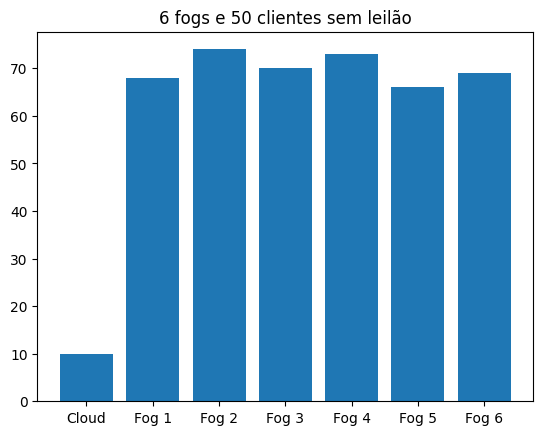

In [37]:
fig = plt.figure()
plt.bar(fogs_labels, messages_df['received_messages_counter'])
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
fig.show()

fig.savefig(f'{results_path}/received_messages.png')

/tmp/ipykernel_1359/1542901058.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


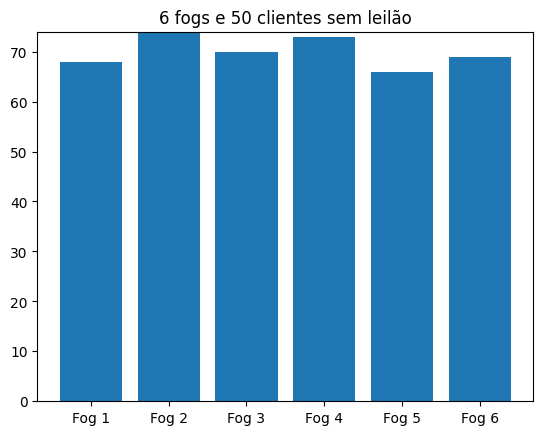

In [38]:
max_height = max(messages_df['received_messages_counter'])

fig = plt.figure()
plt.bar(fogs_labels[1:], messages_df['direct_messages_counter'][1:])
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
plt.ylim(0, max_height)
fig.show()

fig.savefig(f'{results_path}/direct_messages.png')

/tmp/ipykernel_1359/1656262186.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


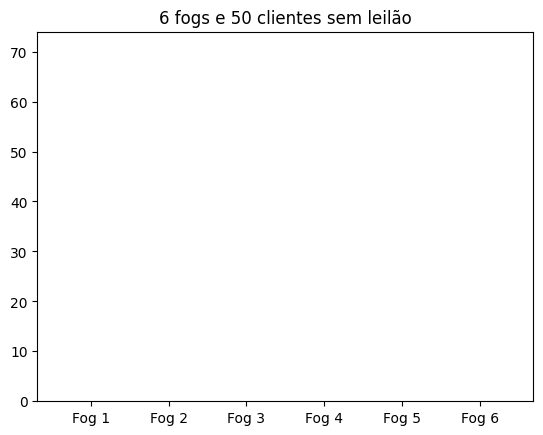

In [39]:
fig = plt.figure()
plt.bar(fogs_labels[1:], messages_df['redirect_messages_counter'][1:])
plt.ylim(0, max_height)
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
fig.show()

fig.savefig(f'{results_path}/redirect_messages.png')

/tmp/ipykernel_1359/2347940638.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


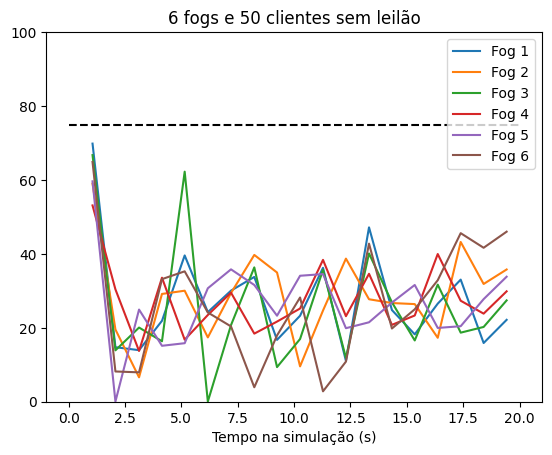

In [40]:
fig = plt.figure()
for i in range(env['QUANTITY_FOGS']):
    plt.plot(cpu_df['time_reference'], cpu_df[f'Fog {i+1}'])
plt.ylim(0, 100)
plt.hlines(env['MESSAGE_PROCESSING_CPU_THRESHOLD'], 0, env['SIMULATION_TIME'], linestyles='dashed', colors='#000000')
plt.legend(fogs_labels[1:])
plt.xlabel("Tempo na simulação (s)")
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
fig.show()

fig.savefig(f'{results_path}/cpu_usage.png')

/tmp/ipykernel_1359/1035388052.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


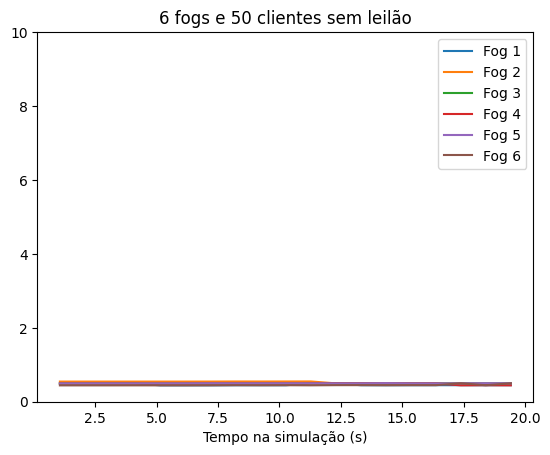

In [41]:
fig = plt.figure()
for i in range(env['QUANTITY_FOGS']):
    plt.plot(memory_df['time_reference'], memory_df[f'Fog {i+1}'])
plt.ylim(0, 10)
plt.legend(fogs_labels[1:])
plt.xlabel("Tempo na simulação (s)")
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
fig.show()

fig.savefig(f'{results_path}/mem_usage.png')

/tmp/ipykernel_1359/39297421.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


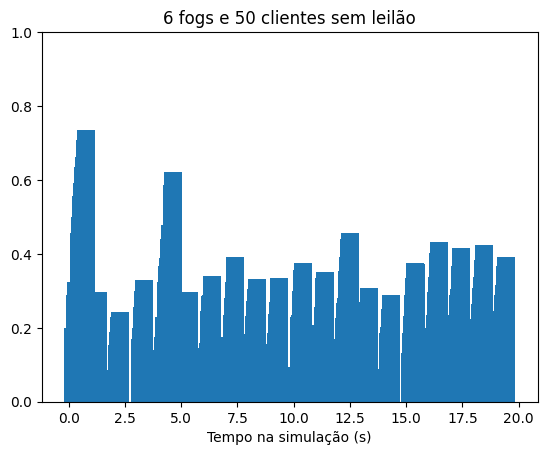

In [42]:
fig = plt.figure()
plt.bar(response_time_df['instant'], response_time_df['response_time'])
plt.ylim([0, 1])
plt.xlabel("Tempo na simulação (s)")
if env['ACTIVATE_AUCTION']:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes com leilão")
else:
    plt.title(f"{env['QUANTITY_FOGS']} fogs e {env['QUANTITY_CLIENTS']} clientes sem leilão")
fig.show()

fig.savefig(f'{results_path}/response_time.png')